# 分析正负先导的发展特征

## 1. 加载2d定位结果数据

In [117]:
# 加载对应的python库
import pandas as pd
import numpy as np

result = pd.read_csv('result_yld_3.8e8_4e8_window_512_128_去零飘_滤波_加窗_阈值15_30_80.txt', sep=r'\s+')

# 对2d结果进行过滤筛选
filtered_result = result[
    (abs(result['t123']) < 1) &  # t123的绝对值小于1
    (abs(result['Rcorr']) > 0.65) &  # Rcorr的绝对值大于0.65
    (result['Start_loc'] < 3.96e8) &  # Start_loc小于4e8
    (result['Start_loc'] > 3.91e8)  & # Start_loc大于3.8e8
    (result['Elevation'] > 45)  
]
filtered_result

,Start_loc,peak,t12,t13,t23,cos_alpha_opt,cos_beta_opt,Azimuth,Elevation,Rcorr,t123
27692,391069998,256,-2.5,-31.5,-29.7,0.151590,-0.321563,154.760013,69.175702,0.685594,-0.7
27693,391070167,256,-2.4,-31.5,-29.7,0.150979,-0.322207,154.893308,69.155953,0.683566,-0.6
27694,391070308,256,-2.4,-31.5,-29.7,0.150979,-0.322207,154.893308,69.155953,0.690872,-0.6
27759,391094208,256,-1.9,-31.2,-29.6,0.146453,-0.323823,155.664569,69.181972,0.696162,-0.3
27760,391094365,256,-1.9,-31.1,-29.5,0.146026,-0.322701,155.652751,69.255436,0.670819,-0.3
...,...,...,...,...,...,...,...,...,...,...,...
33092,392956578,256,-9.1,-47.5,-38.5,0.266995,-0.395098,145.950430,61.519949,0.671369,-0.1
33649,393278903,256,25.6,-14.2,-39.9,-0.119626,-0.551029,192.248577,55.676497,0.652259,-0.1
33932,393426347,256,10.9,-30.8,-42.0,0.054630,-0.514719,173.941562,58.827915,0.664916,-0.3
33933,393426556,256,11.1,-30.7,-41.9,0.052979,-0.514884,174.125226,58.828441,0.675476,-0.1


## 2. 分析负先导的发展特征

In [57]:
# 选出负先导数据
negative_lead_result = filtered_result[
    (filtered_result.Start_loc >= 3.96e8) &
    (filtered_result.Start_loc < 4e8)
]
time_diffs = np.diff(negative_lead_result.Start_loc)
negative_time_diffs = pd.DataFrame(data=time_diffs)
# 查看数据的分布
print("负先导阶段的每个结果之间的采样点之差:\n", negative_time_diffs.describe())
max_diff_idx = np.argmax(time_diffs)
corresponding_start_loc = negative_lead_result.Start_loc.iloc[max_diff_idx]
print("最大的间隔位于:\n",corresponding_start_loc)

# 查看时间间隔大于某阈值的个数

thea = 5000
filtered_positive_time_diffs = time_diffs[ time_diffs > thea]
print(f"时间间隔大于{thea}的个数有：{len(filtered_positive_time_diffs)}")


负先导阶段的每个结果之间的采样点之差:
                   0
count   2348.000000
mean    1699.947189
std     3064.180113
min      129.000000
25%      149.000000
50%      206.000000
75%     1925.750000
max    32405.000000
最大的间隔位于:
 396209145
时间间隔大于5000的个数有：267


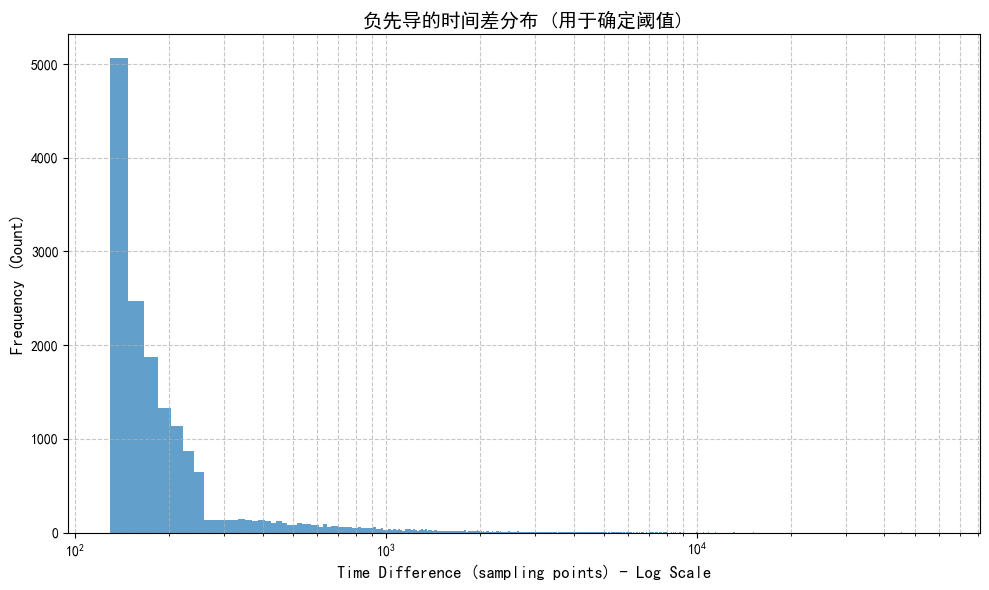

In [41]:
# 绘制直方图，查看梯级间隔的具体分布
import numpy as np
import matplotlib.pyplot as plt

# 确保中文正常显示（Jupyter中需要单独设置）
plt.rcParams["font.family"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False  # 解决负号显示问题

# 创建图形
plt.figure(figsize=(10, 6))  # 设置合适的图大小

# 绘制直方图
n, bins, patches = plt.hist(time_diffs, bins='auto', alpha=0.7)

# 设置x轴为对数刻度
plt.gca().set_xscale('log')

# 设置标题和坐标轴标签
plt.title('负先导的时间差分布 (用于确定阈值)', fontsize=14)
plt.xlabel('Time Difference (sampling points) - Log Scale', fontsize=12)
plt.ylabel('Frequency (Count)', fontsize=12)

# 开启网格
plt.grid(True, which="both", linestyle='--', alpha=0.7)

# 在Jupyter中显示图形
plt.tight_layout() 
plt.show()


## 3. 分析正先导的发展特征

In [47]:
# 选出正先导数据
positive_lead_result = filtered_result[
    (filtered_result.Start_loc >= 3.8e8) &
    (filtered_result.Start_loc < 3.87e8)
]
time_diffs = np.diff(positive_lead_result.Start_loc)
positive_time_diffs = pd.DataFrame(data=time_diffs)
# 查看数据的分布
print("正先导阶段的每个结果之间的采样点之差:\n", positive_time_diffs.describe())
max_diff_idx = np.argmax(time_diffs)

# 获取对应的 Start_loc 值（差值对应的起始位置）
corresponding_start_loc = positive_lead_result.Start_loc.iloc[max_diff_idx]
print("最大的间隔位于:\n",corresponding_start_loc)

# 查看时间间隔大于某阈值的个数

thea = 2500
filtered_positive_time_diffs = time_diffs[ time_diffs > thea]
print(f"时间间隔大于{thea}的个数有：{len(filtered_positive_time_diffs)}")


正先导阶段的每个结果之间的采样点之差:
                   0
count  12167.000000
mean     574.984713
std     1332.285668
min      129.000000
25%      146.000000
50%      183.000000
75%      315.500000
max    25590.000000
最大的间隔位于:
 383586697
时间间隔大于2500的个数有：613


## 4.加载三维的结果

In [60]:
three_d_result = pd.read_csv("../two_station_3D/3d_win512_cost_cal_yld_chj_dtoa.csv")
filtered_3d_result = three_d_result[
    (three_d_result.dlta < 20000) & 
    (three_d_result.yld_start_loc > 3.88e8) & 
    (three_d_result.yld_start_loc < 4e8) & 
    (three_d_result.r_gccs > 0.1) & 
    (abs(three_d_result.R3_value) < 10000) & 
    (three_d_result.x < 6000) & 
    (three_d_result.x > -10000) & 
    (three_d_result.y < 0) & 
    (three_d_result.y > -10000) & 
    (three_d_result.z < 9000) & 
    (three_d_result.z > 500)
]
filtered_3d_result

,yld_start_loc,chj_loc,chj_azimuth,chj_elevation,r_gccs,dlta,R3_value,S_initial_triangulation_1,S_initial_triangulation_2,S_initial_triangulation_3,chi_square_red,cost,dlta_T,x,y,z
2059,388103901,422324360,334.725749,45.021626,0.430682,2558.119840,370.597600,-116.092315,-2804.029001,5509.252613,7.618947,0.455454,-2774.644527,-106.092799,-2814.029001,5519.252613
2060,388142974,422362173,344.141903,40.124320,0.338449,10822.299729,-439.762609,114.184331,-2322.258222,4834.217575,118.967028,0.529241,3377.857170,124.184331,-2332.258222,4844.217575
2061,388153486,422374625,346.077746,43.801359,0.285643,2621.109168,531.236009,771.666843,-1320.040508,6275.894457,8.995128,0.571486,-6370.714720,774.832808,-1330.040508,6285.894457
2063,388284846,422507950,334.433987,45.571859,0.243938,11434.116043,339.309123,-167.504458,-2810.462320,5628.407240,130.662553,0.604850,-16715.779548,-177.504458,-2800.462320,5618.407240
2064,388285025,422505210,333.745058,44.604103,0.262699,3426.611934,425.327419,-198.720084,-2767.154076,5510.163999,13.169743,0.589841,-2110.091547,-188.720115,-2777.154076,5520.163999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4823,399938906,434146257,61.207608,30.971788,0.354787,1307.121340,-328.771762,4607.068203,-6405.771037,1807.513188,2.023199,0.516170,16651.327188,4597.068203,-6415.771037,1797.513188
4824,399939049,434146257,61.207608,30.971788,0.345221,2022.121317,-328.771783,4607.068195,-6405.771040,1807.513186,4.330871,0.523824,17366.327188,4597.068195,-6415.771029,1797.513186
4825,399940685,434146546,19.848992,51.837922,0.381024,12677.806637,1891.055638,2974.126505,-5691.591063,2522.002928,198.999439,0.495181,24100.199877,2984.126470,-5701.591063,2512.002928
4826,399945436,434150789,61.207037,31.277565,0.382344,9923.670331,-44.637233,4248.267105,-6610.530163,1534.297095,97.412650,0.494124,26623.649080,4238.267105,-6620.530163,1524.297095


## 5. 处理三维数据，根据结果的高度，对闪电进行分段

In [157]:
filtered_height_3d_result = filtered_3d_result[
    (filtered_3d_result.z > 1000 ) & (filtered_3d_result.z < 2500 ) &
    (filtered_3d_result.yld_start_loc > 3.989e8 ) & (filtered_3d_result.yld_start_loc < 4e8 )
]
filtered_height_3d_result.yld_start_loc.describe()
# filtered_height_3d_result.yld_start_loc

count    2.010000e+02
mean     3.994205e+08
std      2.917037e+05
min      3.989005e+08
25%      3.991582e+08
50%      3.994549e+08
75%      3.996711e+08
max      3.999986e+08
Name: yld_start_loc, dtype: float64

In [159]:
filtered_height_3d_result = filtered_3d_result[
    (filtered_3d_result.z > 2500 ) & (filtered_3d_result.z < 4000 ) &
    (filtered_3d_result.yld_start_loc > 3.965e8 ) & (filtered_3d_result.yld_start_loc < 3.98e8 )
]
filtered_height_3d_result.yld_start_loc.describe()

count    3.510000e+02
mean     3.974714e+08
std      3.675411e+05
min      3.965024e+08
25%      3.972307e+08
50%      3.975057e+08
75%      3.977837e+08
max      3.979969e+08
Name: yld_start_loc, dtype: float64